0.019744514400231557


<IPython.core.display.Javascript object>


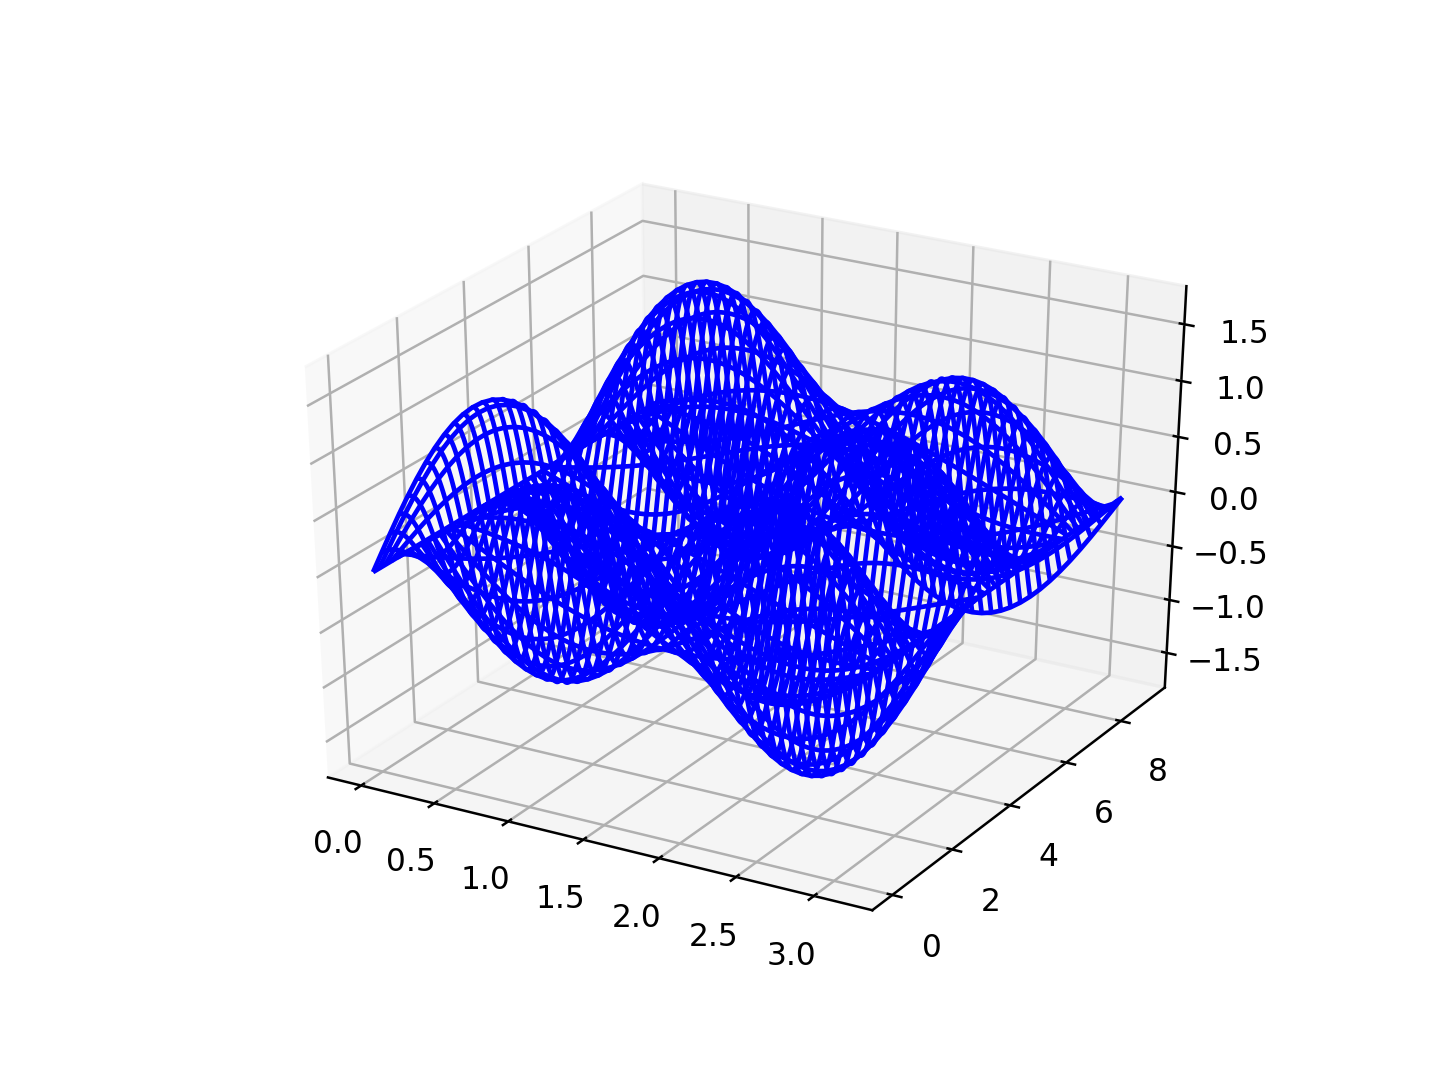

[0.         0.33333333 0.66666667 1.        ]
[0.         0.33333333 0.66666667 1.        ]


In [1]:
#1D heat equation using explicit method
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.animation as animation

v=1            #propagation speed (m/s)
n=50          #spatial points
m=1000         #temporal points
[x1,x2]=[0,np.pi]    #spatial boundaries (m)
[t1,t2]=[0,9]  #temporal boundaries (s)
dx=(x2-x1)/(n-1)     #spatial step size (m)
dt=(t2-t1)/(m-1)   #temporal step size (s)
x=np.linspace(x1,x2,n)
t=np.linspace(t1,t2,m)

a=(v*dt/dx)**2      #alpha^2
print(a)
if a>1:
    print(a)
    raise Exception("a>1, might encounter numerical instability")

u=np.zeros((m,n))  #the grid
f=np.sin(x)+np.sin(2*x)  #initial u(t=0)
g=np.zeros(n)    #initial u'(t=0)

u[0,:]=f
u[1,1:n-1]=a*(f[2:n]+f[0:n-2])/2+g[1:n-1]*dt+(1-a)*f[1:n-1]

for i in range(1,m-1):
    u[i+1,1:n-1]=-u[i-1,1:n-1]+a*(u[i,0:n-2]+u[i,2:n])+2*(1-a)*u[i,1:n-1]

fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')
#fig2,ax2=plt.subplots()
#ylim((-2,2))   # set the ylim to bottom, top
#ylim(-2,1)

kl=4
uo=np.linspace(0,1,kl)
print(uo)
print(uo[0:4])

X,T=np.meshgrid(x,t)
ax.plot_wireframe(X,T,u,color='blue')
#l,=ax2.plot(x,f)

animate = lambda i: l.set_data(x,u[i,:])

ani = animation.FuncAnimation(fig, animate, interval=30,frames=len(t))

plt.show()